# **Introduction**


This notebook explores the **"Superstore Sales"** dataset, a comprehensive collection of sales data from a large retail store offering a wide variety of products. The dataset includes information on **sales, customer segments, and product categories**, covering a period of 2015-2018.

The goal of this analysis is to:
- **Uncover sales patterns** across different regions, categories, and customer segments.
- **Assess business performance** by analyzing shipping efficiency, and customer behavior.
- **Provide actionable insights** to improve profitability and enhance customer satisfaction.

# Import All Dependencies

In [ ]:
# Libraries for data manipulation, visualization, and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with Latin-1 encoding to handle special characters
df = pd.read_csv('superstore_final_dataset (1).csv', encoding='latin-1')

# Data Exploring and Understanding

In [ ]:
# Initial Check
df.head(20)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680
5,6,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,9/6/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [ ]:
# Check all columns info
df.info()
print(f'Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9800 non-null   object        
 1   order_date     9800 non-null   datetime64[ns]
 2   ship_date      9800 non-null   datetime64[ns]
 3   ship_mode      9800 non-null   object        
 4   customer_id    9800 non-null   object        
 5   segment        9800 non-null   object        
 6   city           9800 non-null   object        
 7   state          9800 non-null   object        
 8   region         9800 non-null   object        
 9   category       9800 non-null   object        
 10  sub_category   9800 non-null   object        
 11  product_name   9800 non-null   object        
 12  sales          9800 non-null   float64       
 13  month_year_od  9800 non-null   period[M]     
 14  quarter        9800 non-null   int32         
 15  year_od        9800 n

In [ ]:
# Check statistic value of dataset
df.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


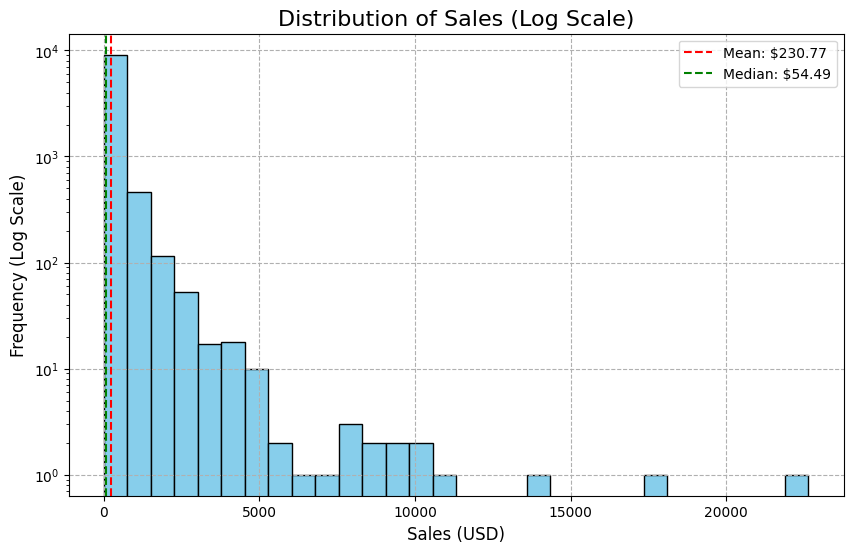

Skewness coefficient : 12.98


In [ ]:
# Distribution of Sales with Mean and Median
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=30, color='skyblue', edgecolor='black', log=True)
plt.axvline(df['Sales'].mean(), color='red', linestyle='--', label=f"Mean: ${df['Sales'].mean():.2f}")
plt.axvline(df['Sales'].median(), color='green', linestyle='--', label=f"Median: ${df['Sales'].median():.2f}")
plt.title('Distribution of Sales (Log Scale)', fontsize=16)
plt.xlabel('Sales (USD)', fontsize=12)
plt.ylabel('Frequency (Log Scale)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=1)
plt.show()

# Calculate skewness coefficient
sales_skewness = df['Sales'].skew()
print(f'Skewness coefficient : {sales_skewness:.2f}')

The sales data is right-skewed, with a skewness coefficient of 12.98. This indicates that the distribution has a longer tail on the right, with a mean of 230.76 being significantly higher than the median of 57.49. This suggests that a few high-value transactions are pulling the mean upwards.

In [ ]:
# Identified the duplicates
print(f'There are {df.duplicated().sum()} duplicates in the dataset')

There are 0 duplicates in the dataset


In [ ]:
# Check for missing values in the dataset
missing_value = df.isna().sum().sort_values(ascending=False)
print(missing_value)

# Assess the significance of missing values
print(f'The percentage of missing value in Postal Code is : {round((df["Postal_Code"].isna().sum() / len(df)) * 100, 2)}% of data set')

Postal_Code      11
Row_ID            0
Order_ID          0
Product_Name      0
Sub_Category      0
Category          0
Product_ID        0
Region            0
State             0
City              0
Country           0
Segment           0
Customer_Name     0
Customer_ID       0
Ship_Mode         0
Ship_Date         0
Order_Date        0
Sales             0
dtype: int64
The percentage of missing value in Postal Code is : 0.11% of data set


The Postal Code column has 11 missing values, which represents only 0.11% of the dataset. Since this is a small percentage and Postal Code is not critical for our analysis, we can safely ignore these missing values.

In [ ]:
# Unique Value each columns
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Unique values in column '{column}': {unique_values}")
    print()


Unique values in column 'Row_ID': 9800

Unique values in column 'Order_ID': 4922

Unique values in column 'Order_Date': 1230

Unique values in column 'Ship_Date': 1326

Unique values in column 'Ship_Mode': 4

Unique values in column 'Customer_ID': 793

Unique values in column 'Customer_Name': 793

Unique values in column 'Segment': 3

Unique values in column 'Country': 1

Unique values in column 'City': 529

Unique values in column 'State': 49

Unique values in column 'Postal_Code': 626

Unique values in column 'Region': 4

Unique values in column 'Product_ID': 1861

Unique values in column 'Category': 3

Unique values in column 'Sub_Category': 17

Unique values in column 'Product_Name': 1849

Unique values in column 'Sales': 5757



**Key Takeaways**

- The dataset consists of **18 features**, including **15 categorical** and **3 numerical** variables.
- There are **no duplicated records** in the dataset, ensuring data integrity.
- The **Order_Date** and **Ship_Date** columns need to be converted into datetime format for time-based analysis.
- The **Postal_Code** column contains **11 missing values**, which represent only **0.11%** of the dataset and are insignificant for our analysis.
- Some **Product_ID** values share the same **Product_Name**, indicating potential data entry issues or product variants.
- The Sales data exhibits a right-skewed distribution, as indicated by:
  * The mean being greater than the median.
  * The maximum value being significantly larger than the mean.
  * The data having high variability based on the standard deviation.

**Irrelevant Columns**
The following columns are irrelevant for analysis and can be dropped:
- **Row_ID**: This is just an index and provides no analytical value.
- **Customer_Name**: Contains too many unique values and is not useful for aggregate analysis.
- **Postal_Code**: Not critical for regional analysis, as we already have **City** and **State** columns.
- **Country**: Contains only **1 unique value** (United States), making it redundant for analysis.
- **Product_ID**: While useful for unique identification, it is not necessary for aggregate analysis.


# Data Cleaning

In [ ]:
# Dropping columns that are irrelevant for analysis
df.drop(['Country', 'Row_ID', 'Customer_Name', 'Postal_Code', 'Product_ID'], axis=1, inplace=True)

In [ ]:
# Convert order_date and ship_date to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y')

In [ ]:
# Create new columns for time-based analysis
# - Month_Year_OD: Combines year and month from Order_Date for monthly analysis.
# - Quarter: Extracts the quarter from Order_Date for quarterly analysis.
# - Year_OD: Extracts the year from Order_Date for yearly analysis.
# - Year_Quarter: Combines year and quarter for easier time-series grouping.
df['Month_Year_OD'] = df['Order_Date'].dt.to_period('M')
df['Quarter'] = df['Order_Date'].dt.quarter
df['Year_OD'] = df['Order_Date'].dt.year
df['Year_Quarter'] = df['Year_OD'].astype(str) + '-Q' + df['Quarter'].astype(str)

In [ ]:
# Rename columns to lowercase for consistency
df = df.rename(columns=str.lower)

# Exploratory Data Analysis (EDA)

### Customer Behaviour

##### Customer Retention

In [ ]:
# Count orders per customer
customer_orders = df.groupby(['customer_id',])['order_date'].nunique()

# Identify repeat customers
repeat_customers = customer_orders[customer_orders > 1].count()
total_customers = customer_orders.count()

# Calculate customer retention rate
customer_retention_rate = (repeat_customers / total_customers) * 100
print(f"Customer Retention Rate: {customer_retention_rate:.2f}%")

Customer Retention Rate: 98.36%


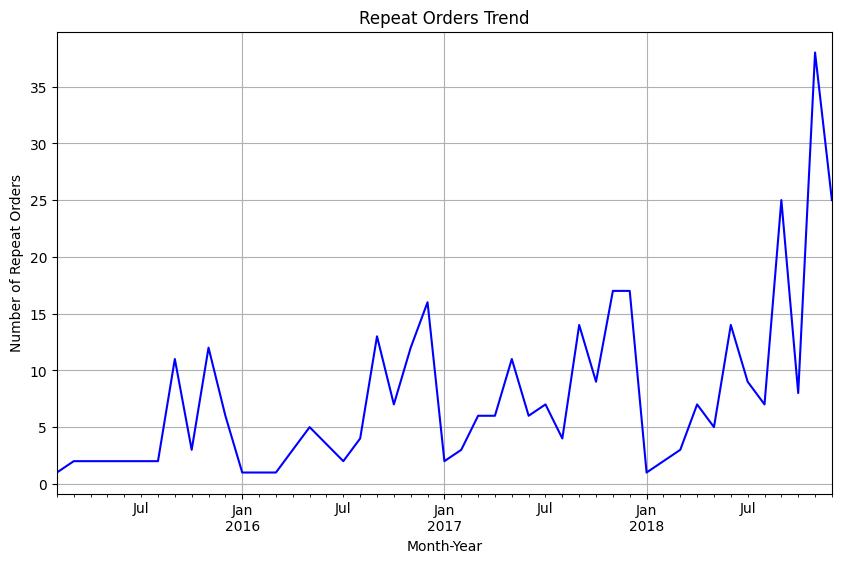

In [ ]:
# Count repeat orders over time
repeat_orders = df.groupby(['customer_id', 'month_year_od'])['order_id'].nunique().reset_index()
repeat_orders = repeat_orders[repeat_orders['order_id'] > 1]

# Aggregate by month
repeat_orders_over_time = repeat_orders.groupby('month_year_od').size()


plt.figure(figsize=(10, 6))
repeat_orders_over_time.plot(kind='line', color='blue')
plt.title('Repeat Orders Trend')
plt.xlabel('Month-Year')
plt.ylabel('Number of Repeat Orders')
plt.grid(True)
plt.show()


In [ ]:
# Repeat orders date difference
customer_order_date = df[['customer_id', 'order_date']].sort_values(by=['customer_id', 'order_date'])
customer_order_date['date_diff'] = customer_order_date.groupby('customer_id')['order_date'].diff().dt.days
print(f'The average time between repeat orders for customers is {customer_order_date["date_diff"].mean():.2f} days')

The average time between repeat orders for customers is 87.45 days


<ipython-input-16-ed11a4db9ea4>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  segment_time_diff = df.groupby('segment').apply(


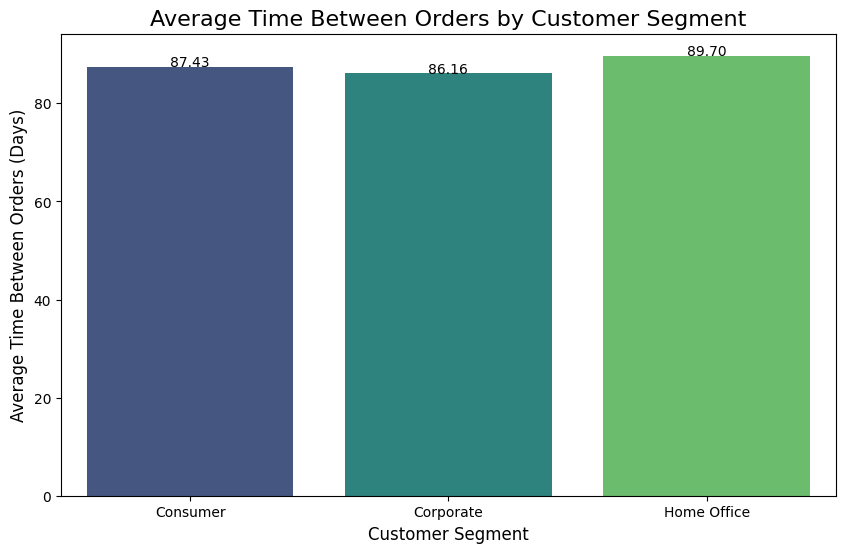

In [ ]:
# Calculate average time between repeat orders for each customer segment
segment_time_diff = df.groupby('segment').apply(
    lambda x: x.sort_values('order_date').groupby('customer_id')['order_date'].diff().dropna().dt.days.mean()
).reset_index(name='avg_time_between_orders')

plt.figure(figsize=(10, 6))
sns.barplot(data=segment_time_diff, x='segment', y='avg_time_between_orders', palette='viridis', hue='segment', legend=False)
plt.title('Average Time Between Orders by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average Time Between Orders (Days)', fontsize=12)

for i, avg_time in enumerate(segment_time_diff['avg_time_between_orders']):
    plt.text(i, avg_time, f"{avg_time:,.2f}", ha='center', fontsize=10)

plt.show()

In [ ]:
# Number of customers
first_purchase = df.groupby('customer_id')['order_date'].min().reset_index()
first_purchase['first_purchase_year'] = first_purchase['order_date'].dt.year

new_customers = first_purchase.groupby('first_purchase_year')['customer_id'].nunique().reset_index()
new_customers.columns = ['year', 'new_customers']

total_customers = df.groupby('year_od')['customer_id'].nunique().reset_index()
total_customers.columns = ['year', 'total_customers']

customers = pd.merge(new_customers, total_customers, on='year')
customers

,year,new_customers,total_customers
0,2015,589,589
1,2016,141,567
2,2017,52,635
3,2018,11,690


In [ ]:
# Customer Growth Rate
customer_growth_rate = ((customers[customers['year'] == 2018]['total_customers'].values[0] - customers[customers['year'] == 2015]['total_customers'].values[0]) / customers[customers['year'] == 2015]['new_customers'].values[0]*100)
print(f'Customer Growth Rate: {customer_growth_rate:.2f}%')

Customer Growth Rate: 17.15%


Key Insights:

* The customer retention rate demonstrates exceptional performance, maintaining a high value of 98.36%.

 - The high retention rate suggests that the majority of customers make repeat purchases, indicating strong customer loyalty.
 - However, new customer acquisition is minimal, with total customers growing only 17% from 2015–2018. This reliance on retained customers limits growth potential.

* The repeat order graph reveals an overall upward trend in repeat orders over the years, indicates a noticeable trend, with a significant increase in repeat orders observed during the second half of each year.
* The average time between repeat orders for customers is 87.45 days or approximately 3 months.

  - Corporate customers have the shortest average time between orders (86.16 days), indicating higher engagement and potential for upselling.

  - Home Office customers have the longest average time between orders (89.70 days), suggesting less frequent purchases and an opportunity to improve engagement.


Actionable Strategies :
* Leverage High Retention for Growth:
  - Introduce loyalty programs or subscription models to further engage retained customers.
  - Upsell/cross-sell higher-margin products to loyal customers, especially Corporate customers.

* Increase New Customer Acquisition:
  - Invest in marketing channels (e.g., social media ads, influencer partnerships) to attract new customers.
  - Launch referral programs to incentivize existing customers to bring in new ones.

* Target Customer Segments Differently:
  - Corporate Customers: Introduce subscription plans and exclusive perks to increase engagement and shorten reorder cycles
  - Consumer Customers :  Launch a loyalty program and personalized recommendations to drive repeat purchases.
  - Home Office Customers: Improve engagement with targeted campaigns to reduce the time between orders.

* Capitalize on Seasonal Trends: Plan promotions and campaigns around the second half of the year when repeat orders spike.





##### Average Order Value (AOV)

In [ ]:
# Calculate Average Order Value per Year
total_sales_orders = df.groupby('year_od').agg(
    total_sales=('sales', 'sum'),
    total_orders=('order_id', 'nunique'),
).reset_index()

total_sales_orders['AOV'] = total_sales_orders['total_sales'] / total_sales_orders['total_orders']
total_sales_orders

,year_od,total_sales,total_orders,AOV
0,2015,479856.2081,947,506.711941
1,2016,459436.0054,1019,450.869485
2,2017,600192.5500,1295,463.469151
3,2018,722052.0192,1661,434.709223


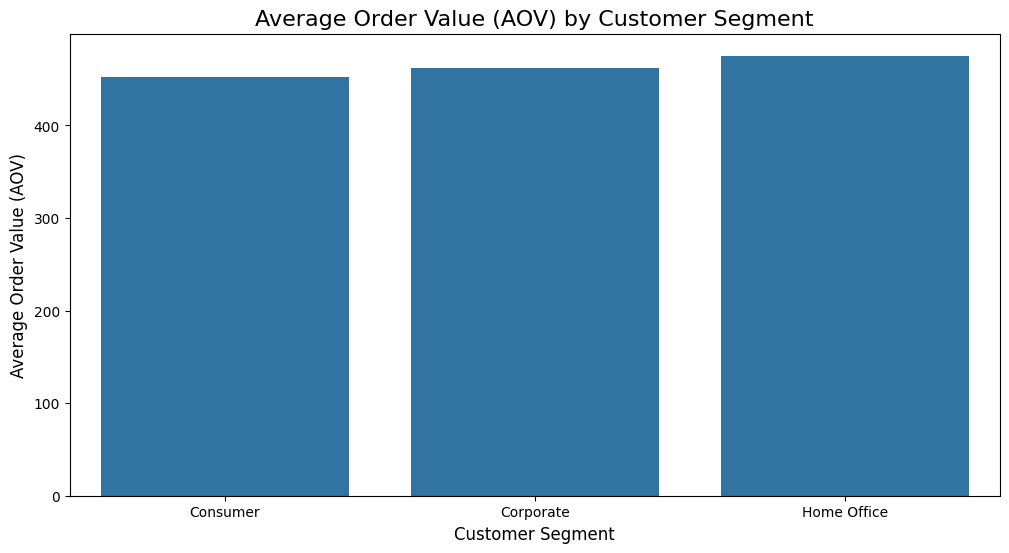

In [ ]:
# Calculate AOV by customer segment
aov_by_segment = df.groupby('segment').agg(
    total_sales=('sales', 'sum'),
    total_orders=('order_id', 'nunique')
).reset_index()
aov_by_segment['AOV'] = aov_by_segment['total_sales'] / aov_by_segment['total_orders']

plt.figure(figsize=(12, 6))
sns.barplot(data=aov_by_segment, x='segment', y='AOV')
plt.title('Average Order Value (AOV) by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Average Order Value (AOV)', fontsize=12)
plt.show()

Key Insights:

* The most significant jump in sales occurred between 2016 and 2017, with an increase of approximately 140,756.55.
* Total orders steadily increased every year, suggesting higher order frequency.
* The AOV (calculated as total sales divided by total orders) shows a decreasing trend from 2015 to 2018.
This suggests that while more orders are being placed, the average amount spent per order has been declining. This could be due to discounts, smaller order sizes, or changes in product pricing.
* Business Growth with Reduced Per-Order Value:
The business is growing in terms of total sales and orders, but the reduced AOV might require attention.
* The AOV for Consumer, Corporate, and Home Office segments are relatively close, with Home Office having the highest AOV. This suggests that while all segments contribute similarly, there may be untapped opportunities for increasing AOV in some segments.

Actionable Strategies :
  - Focus on value-added incentives like free shipping thresholds or product bundles.
  - Targeted Promotions for Home Office Segment:
    - Introduce high-value product bundles or loyalty incentives for repeat purchases.
    - Offer personalized marketing campaigns focusing on premium or productivity-enhancing products.
    
  - Corporate Bulk Purchase Incentives:
    - Provide dedicated account managers for personalized assistance and upselling opportunities.
    - Encourage bulk purchases with tiered discounts and bundled deals to maximize order value.

  - Consumer Segment Upsell Strategy:
    -  Increase cart size with cross-selling, free shipping thresholds, and limited-time bundles.



##### Customer Segmentation

In [ ]:
cust_segment = df.groupby(['segment']).agg(
    sales=('sales', 'sum'),
    number_of_cust=('customer_id', 'nunique')
).reset_index()
cust_segment['average_sales_cust'] = (cust_segment['sales'] / cust_segment['number_of_cust'])

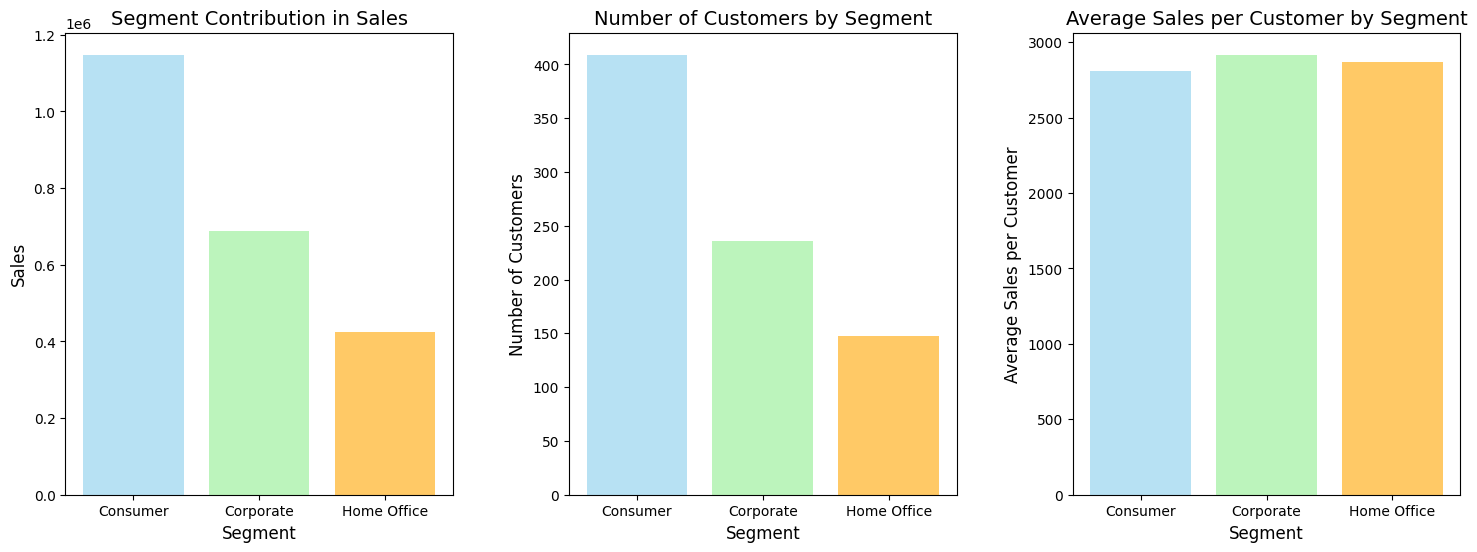

In [ ]:
# Plot sales, number of customers, and average sales per customer by segment
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
colors = ['skyblue', 'lightgreen', 'orange']

# Segment Contribution in Sales
ax1.bar(cust_segment['segment'], cust_segment['sales'], color=colors, alpha=0.6)
ax1.set_title('Segment Contribution in Sales', fontsize=14)
ax1.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Sales', fontsize=12)

# Number of Customers by Segment
ax2.bar(cust_segment['segment'], cust_segment['number_of_cust'], color=colors, alpha=0.6)
ax2.set_title('Number of Customers by Segment', fontsize=14)
ax2.set_xlabel('Segment', fontsize=12)
ax2.set_ylabel('Number of Customers', fontsize=12)

# Average Sales per Customer by Segment
ax3.bar(cust_segment['segment'], cust_segment['average_sales_cust'], color=colors, alpha=0.6)
ax3.set_title('Average Sales per Customer by Segment', fontsize=14)
ax3.set_xlabel('Segment', fontsize=12)
ax3.set_ylabel('Average Sales per Customer', fontsize=12)

plt.subplots_adjust(wspace=0.3)
plt.show()

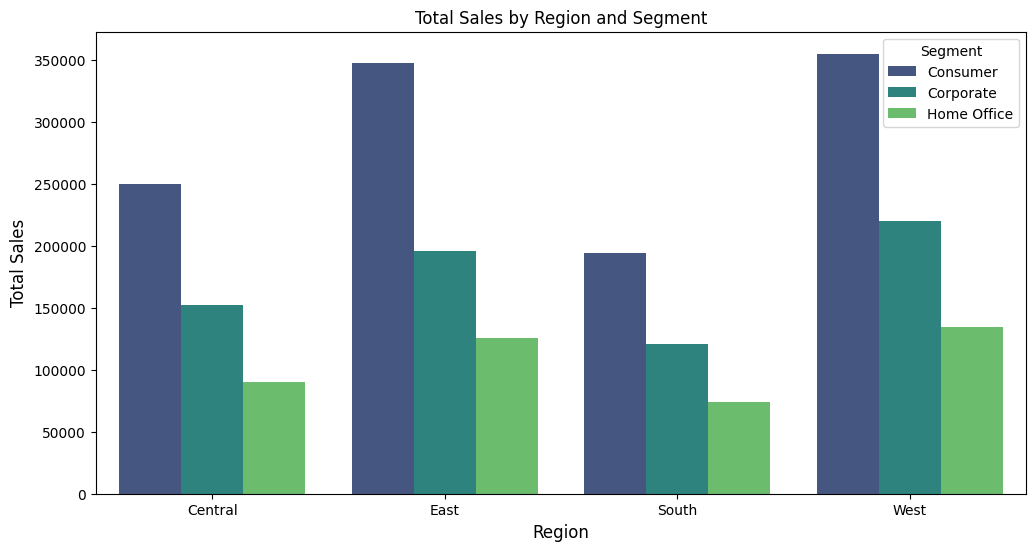

In [ ]:
region_segment = df.groupby(['region', 'segment'])['sales'].sum().reset_index()
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=region_segment, x='region', y='sales', hue='segment', ax=ax, palette='viridis')
ax.set_title('Total Sales by Region and Segment', fontsize=16)
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Total Sales', fontsize=12)
plt.title('Total Sales by Region and Segment')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Segment')
plt.show()

Key Insights
* Consumer Segment Dominance:
  - The Consumer segment has the highest number of customers and contributes the most to total sales, confirming that the business's primary market is individual consumers.
  - Despite its dominance, the Consumer segment shows the lowest average sales per customer, highlighting an opportunity for growth through upselling or cross-selling.

* Corporate Segment Value:
  - The Corporate segment has significantly fewer customers compared to the Consumer segment but contributes relatively high total sales.
  - With one of the highest average sales per customer, Corporate customers tend to place larger orders, making this a valuable segment despite its smaller customer base.

* Home Office Segment Potential:
  - The Home Office segment has the smallest customer base and the lowest total sales contribution. However, its average sales per customer are comparable to the Corporate segment, indicating that Home Office customers place high-value orders.
  - This suggests untapped potential if more customers can be attracted to this segment.

* Regional Sales Distribution:
  - The Consumer segment consistently generates the highest sales across all regions, particularly in the East and West, where sales significantly outperform other segments.
  - The South region shows relatively lower sales across all segments, indicating a potential growth opportunity.

Actionable Strategies:
* Consumer Segment:
  - Focus on increasing the average sales per customer by implementing personalized upselling and cross-selling strategies.
  - Introduce loyalty programs to incentivize repeat purchases and boost order values.
* Corporate Segment:
  - Invest in customer acquisition to expand this high-value segment.
  - Strengthen customer relationship management (CRM) strategies by offering personalized services and exclusive business packages to retain and engage corporate clients.
* Home Office Segment:
  - Attract more Home Office customers through targeted marketing campaigns.
  - Develop tailored product bundles and offer value-added services like setup assistance to maintain high average order values.




### Sales Trends

##### Sales Trends

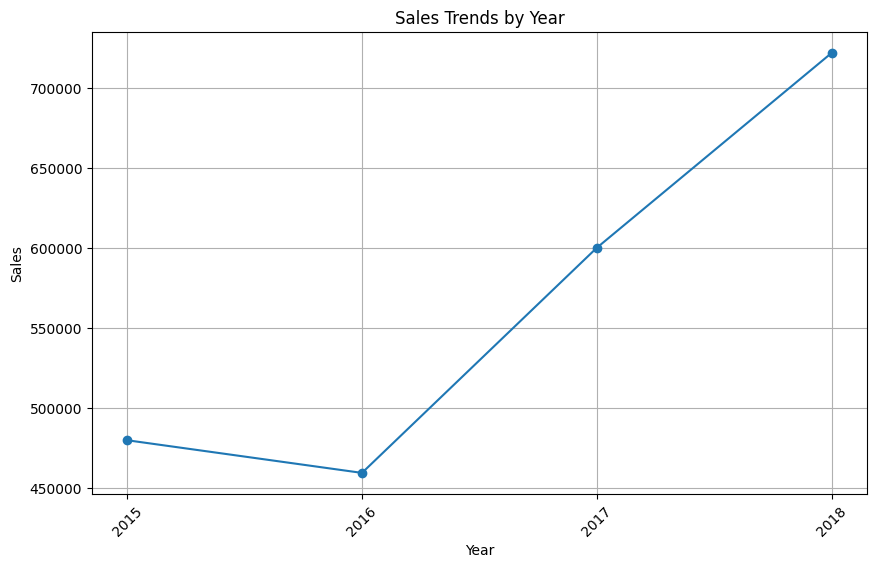

In [ ]:
# Sales Trends by Year
sales_year = df.groupby('year_od')['sales'].sum().reset_index()
sales_year['year_od'] = sales_year['year_od'].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(sales_year['year_od'], sales_year['sales'], marker='o')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trends by Year')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

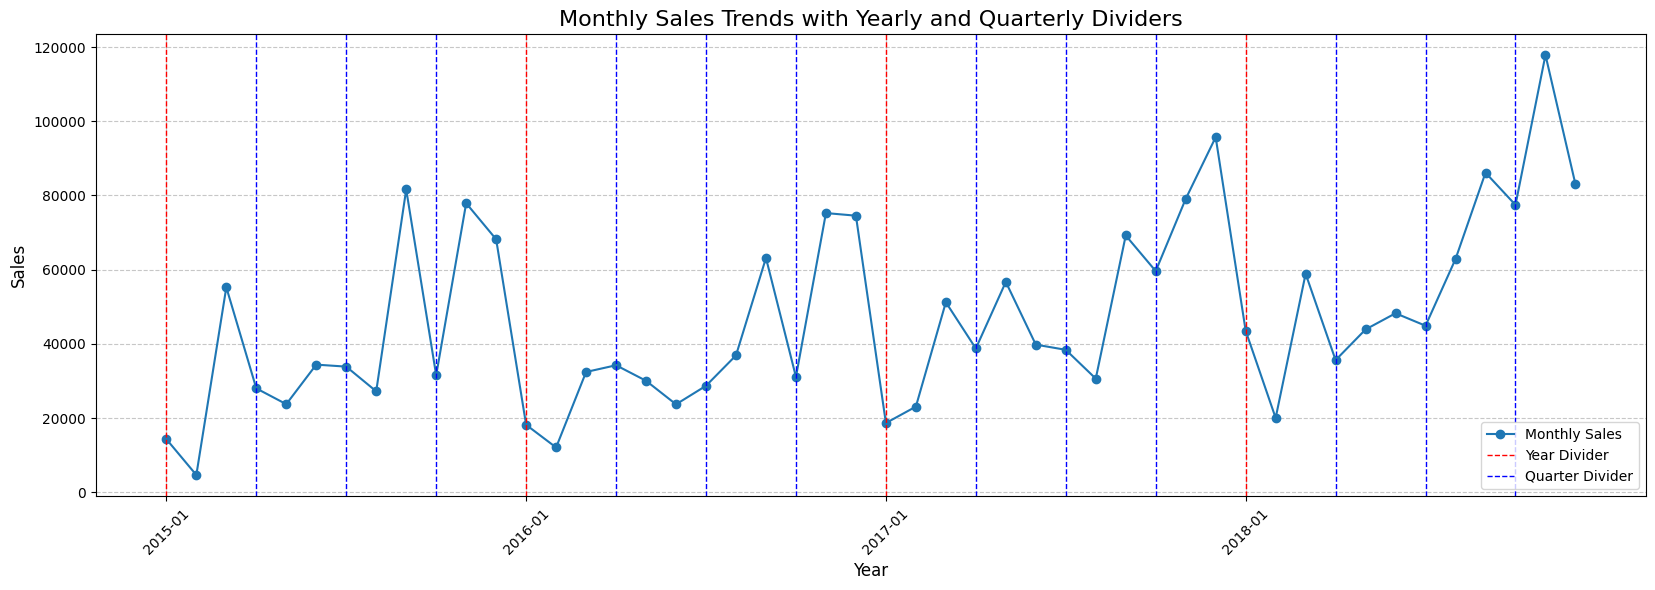

In [ ]:
# Sales Trends by Monthly
sales_month_year = df.groupby('month_year_od')['sales'].sum().reset_index()
sales_month_year['month_year_od'] = sales_month_year['month_year_od'].astype(str)

plt.figure(figsize=(20, 6))
plt.plot(sales_month_year['month_year_od'], sales_month_year['sales'], marker='o', label='Monthly Sales')

for i, date in enumerate(sales_month_year['month_year_od']):
    if date.endswith('-01'):  # Year divider
        plt.axvline(x=i, color='red', linestyle='--', linewidth=1, label='Year Divider' if i == 0 else None)
    elif date[-2:] in ['04', '07', '10']:  # Quarter divider
        plt.axvline(x=i, color='blue', linestyle='--', linewidth=1, label='Quarter Divider' if i == 3 else None)

xticks = [i for i, date in enumerate(sales_month_year['month_year_od']) if date.endswith('-01')]
xtick_labels = [date for date in sales_month_year['month_year_od'] if date.endswith('-01')]
plt.xticks(xticks, xtick_labels, rotation=45)

plt.title('Monthly Sales Trends with Yearly and Quarterly Dividers', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

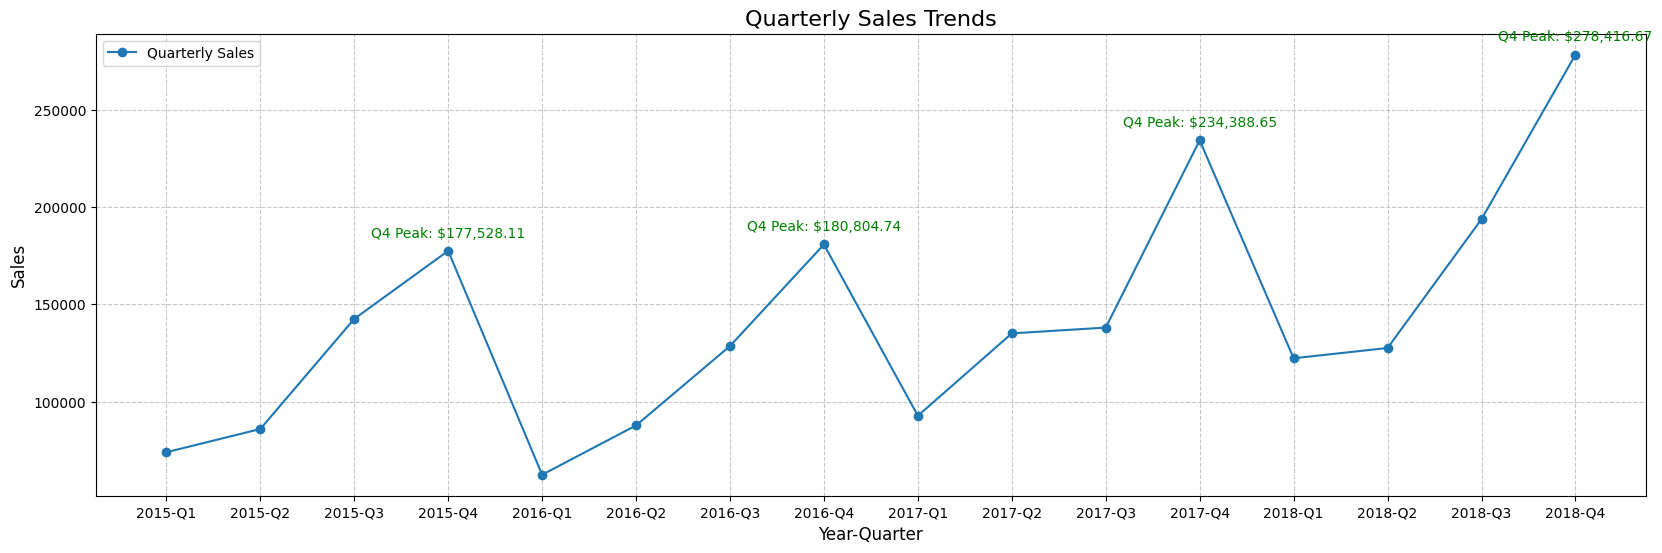

In [ ]:
# Sales Trends by Year-Quarter
sales_year_quarter = df.groupby('year_quarter')['sales'].sum().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(sales_year_quarter['year_quarter'], sales_year_quarter['sales'], marker='o', label='Quarterly Sales')

for i, row in sales_year_quarter.iterrows():
    if row['year_quarter'].endswith('Q4'):
        plt.annotate(f"Q4 Peak: ${row['sales']:,.2f}",
                     (i, row['sales']),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontsize=10,
                     color='green')

plt.title('Quarterly Sales Trends', fontsize=16)
plt.xlabel('Year-Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Key Insights:
* Sales rebounded significantly after a dip in 2016, demonstrating strong recovery in 2017 and continued growth in 2018.
* The upward trend from 2016 to 2018 reflects effective business strategies and market adaptation.
* Q4 consistently records the highest sales each year, with Q4 2018 achieving the peak performance.
* The second half of the year (Q3–Q4) contributes the majority of annual revenue, driven by strong Q4 results.
* Q1 consistently experiences the lowest sales, indicating a recurring post-holiday slowdown.
* Sales demonstrate a steady recovery from Q1, improving through Q2 and Q3 before peaking in Q4.
* Seasonal sales volatility is observed, with fluctuations occurring before stabilization in Q3.

Actionable Strategies:
* Address mid-year fluctuations to enhance revenue predictability and operational planning.
* Ramp up marketing efforts in Q3 to maximize Q4 performance.
Optimize inventory management to align with seasonal demand trends.
* Implement targeted post-holiday promotions and product launches in Q1 to mitigate early-year declines.
* Develop customer retention programs to maintain engagement and boost sales in historically weaker months.
* Focus on sustaining a predictable growth trajectory by optimizing Q4 performance, addressing Q1 slowdowns, and minimizing mid-year volatility.





##### Product Insight

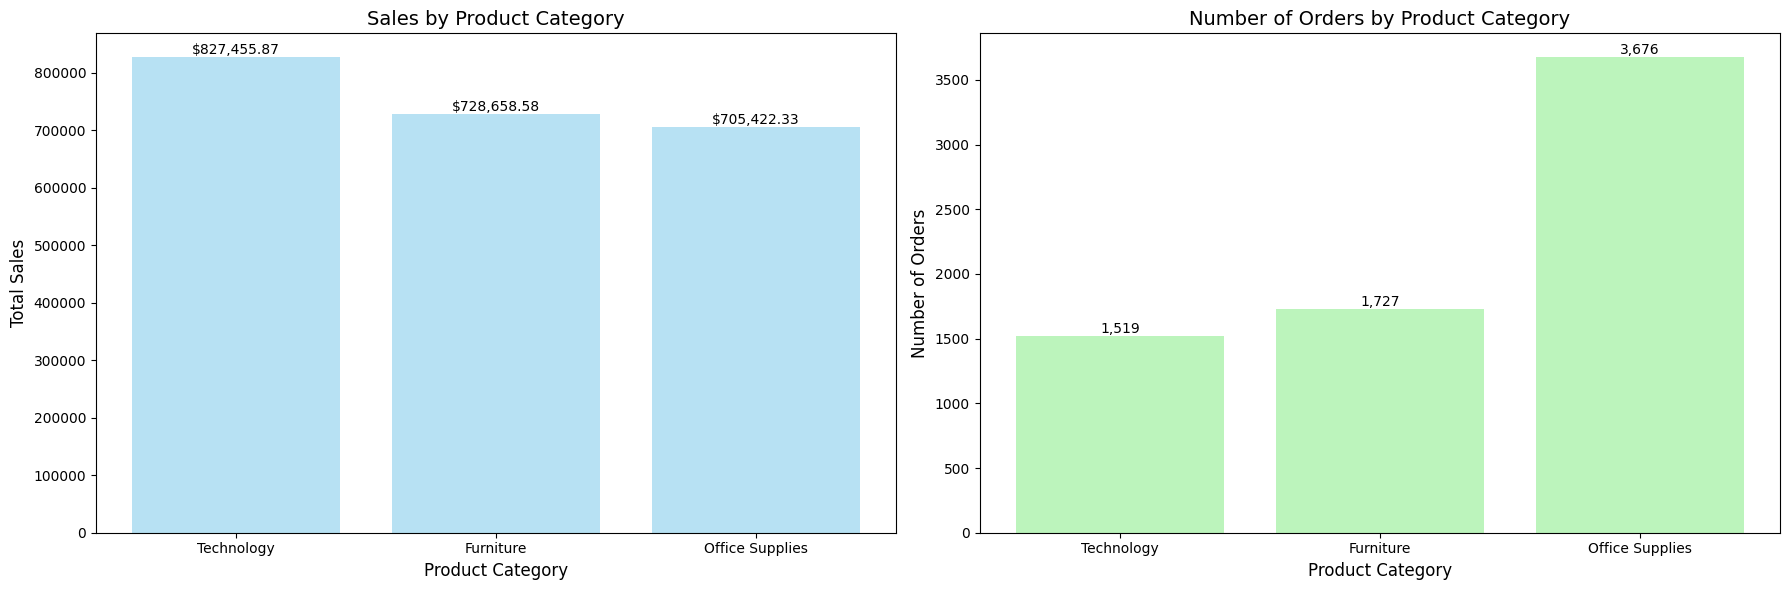

In [ ]:
# Product Category Analysis
product_category = df.groupby('category').agg(
    sales=('sales', 'sum'),
    number_of_order=('order_id', 'nunique')
).reset_index()
product_category = product_category.sort_values(by='sales', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Sales by Category
ax1.bar(product_category['category'], product_category['sales'], color='skyblue', alpha=0.6)
ax1.set_title('Sales by Product Category', fontsize=14)
ax1.set_xlabel('Product Category', fontsize=12)
ax1.set_ylabel('Total Sales', fontsize=12)

for i, sales in enumerate(product_category['sales']):
    ax1.text(i, sales, f"${sales:,.2f}", ha='center', va='bottom', fontsize=10)

# Number of Orders by Category
ax2.bar(product_category['category'], product_category['number_of_order'], color='lightgreen', alpha=0.6)
ax2.set_title('Number of Orders by Product Category', fontsize=14)
ax2.set_xlabel('Product Category', fontsize=12)
ax2.set_ylabel('Number of Orders', fontsize=12)

for i, orders in enumerate(product_category['number_of_order']):
    ax2.text(i, orders, f"{orders:,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

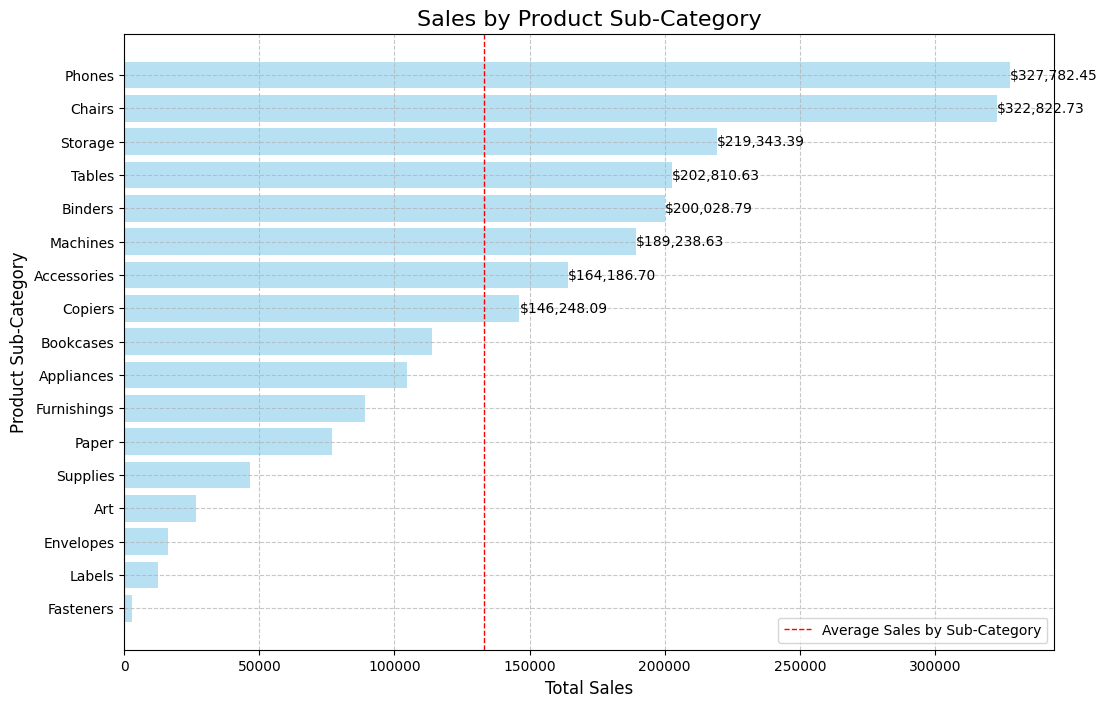

In [ ]:
# Product Sub-Category Analysis
product_sub_category = df.groupby('sub_category')['sales'].sum().reset_index()
product_sub_category = product_sub_category.sort_values(by='sales', ascending=True)
product_sub_category_mean = product_sub_category['sales'].mean()

plt.figure(figsize=(12, 8))
plt.barh(product_sub_category['sub_category'], product_sub_category['sales'], color='skyblue', alpha=0.6)
plt.axvline(x=product_sub_category_mean, color='red', linestyle='--', linewidth=1, label='Average Sales by Sub-Category')
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Sub-Category', fontsize=12)
plt.title('Sales by Product Sub-Category', fontsize=16)

for i, sales in enumerate(product_sub_category['sales']):
    if sales > product_sub_category_mean:
        plt.text(sales, i, f"${sales:,.2f}", va='center', fontsize=10, color='black')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


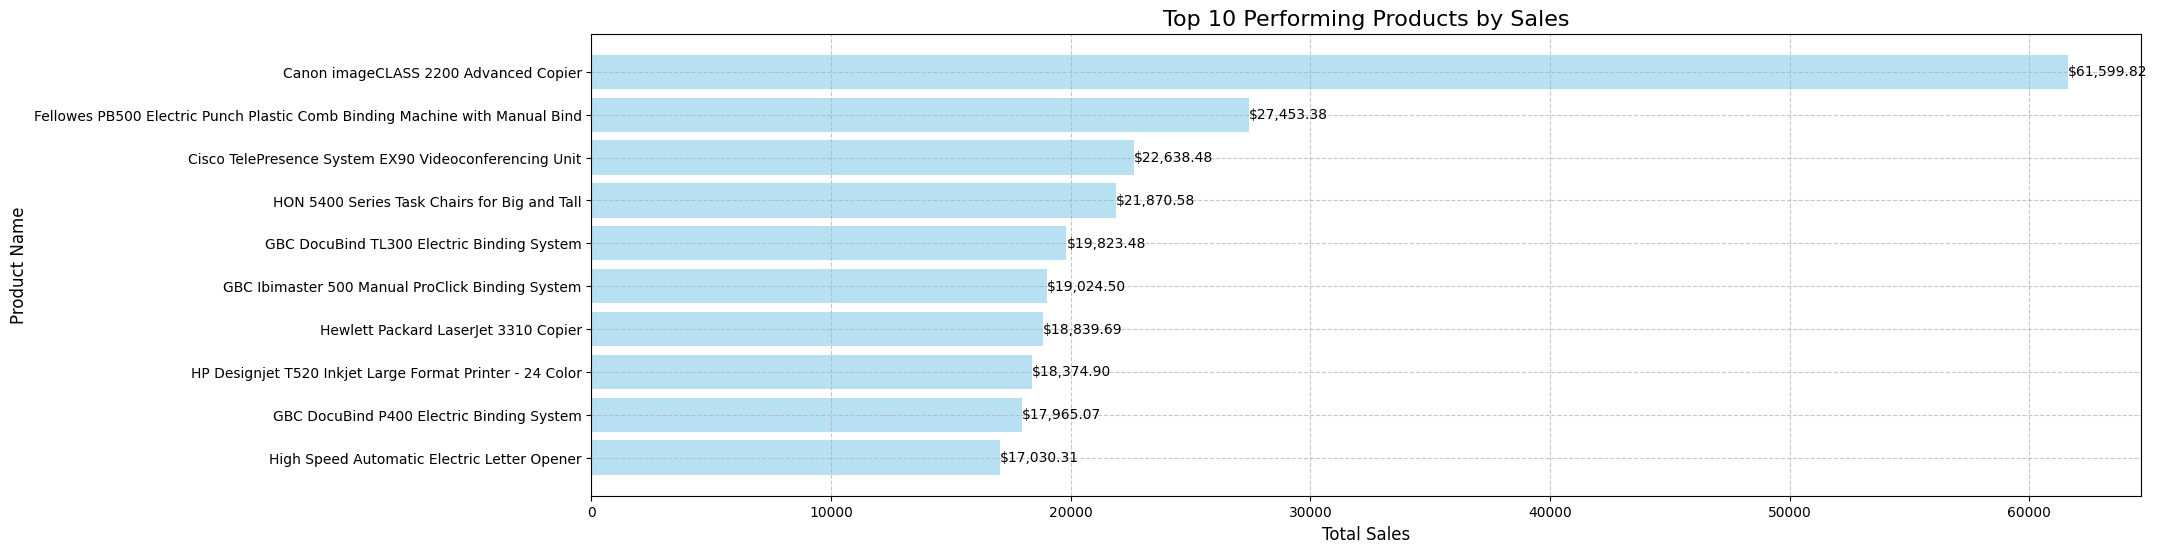

In [ ]:
# Top Selling Products
top_selling_product = df.groupby('product_name')['sales'].sum().nlargest(10).iloc[::-1].reset_index()

plt.figure(figsize=(20, 6))
plt.barh(top_selling_product['product_name'], top_selling_product['sales'], color='skyblue', alpha=0.6)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.title('Top 10 Performing Products by Sales', fontsize=16)

for i, sales in enumerate(top_selling_product['sales']):
    plt.text(sales, i, f"${sales:,.2f}", va='center', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

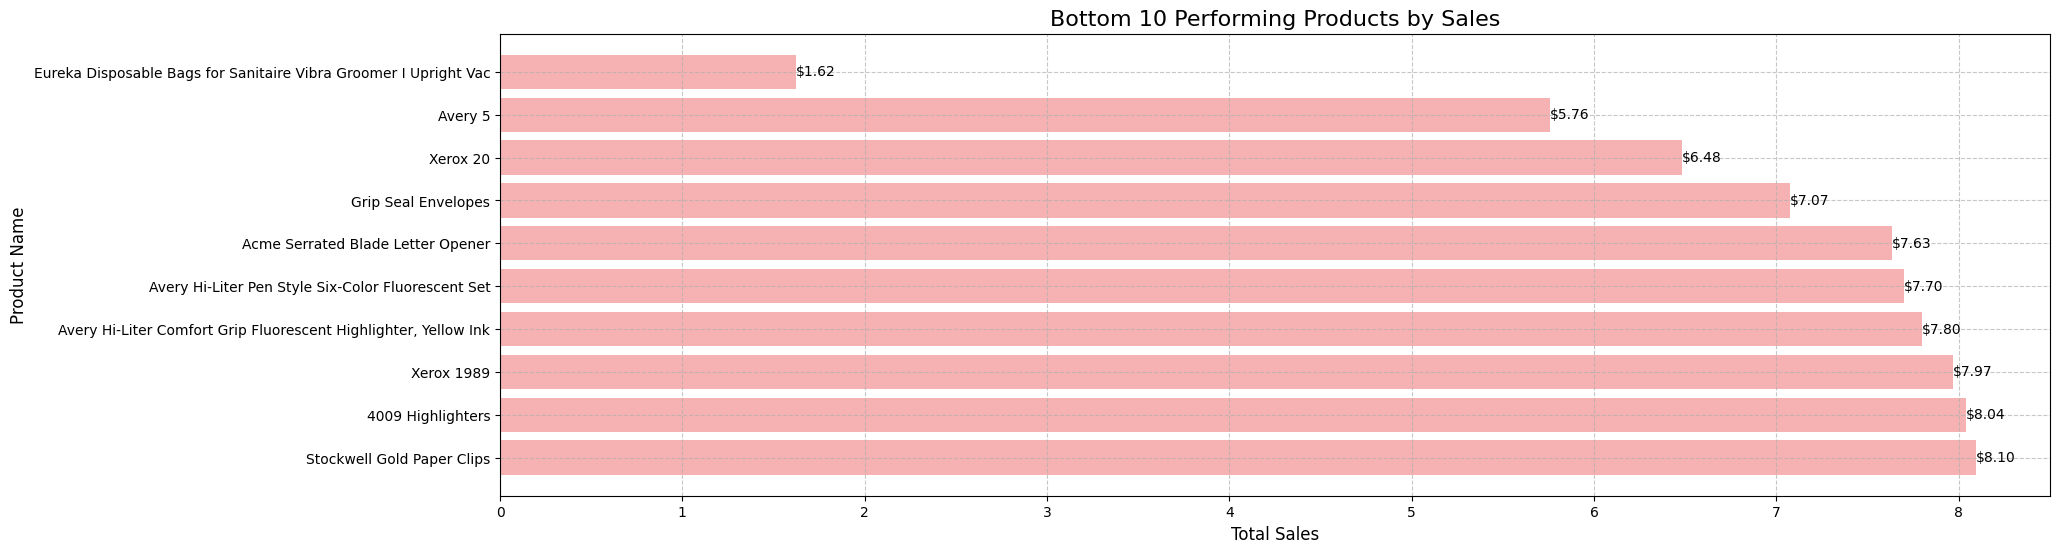

In [ ]:
# Least Selling Products
least_selling_product = df.groupby('product_name')['sales'].sum().nsmallest(10).iloc[::-1].reset_index()

plt.figure(figsize=(20, 6))
plt.barh(least_selling_product['product_name'], least_selling_product['sales'], color='lightcoral', alpha=0.6)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.title('Bottom 10 Performing Products by Sales', fontsize=16)

for i, sales in enumerate(least_selling_product['sales']):
    plt.text(sales, i, f"${sales:,.2f}", va='center', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Key Insight:
* The Technology category has the highest sales but the lowest number of orders, indicating higher-priced items.
* The Office Supplies segment has the highest number of orders but contributes less to total sales, suggesting lower-priced items.
* Increasing the order volume in Technology or the average price per order in Office Supplies could significantly boost revenue.
- The least-selling products are primarily from the **Office Supplies** category, indicating low demand. Consider discontinuing or rebranding these products to improve sales performance.

##### Regional Sales

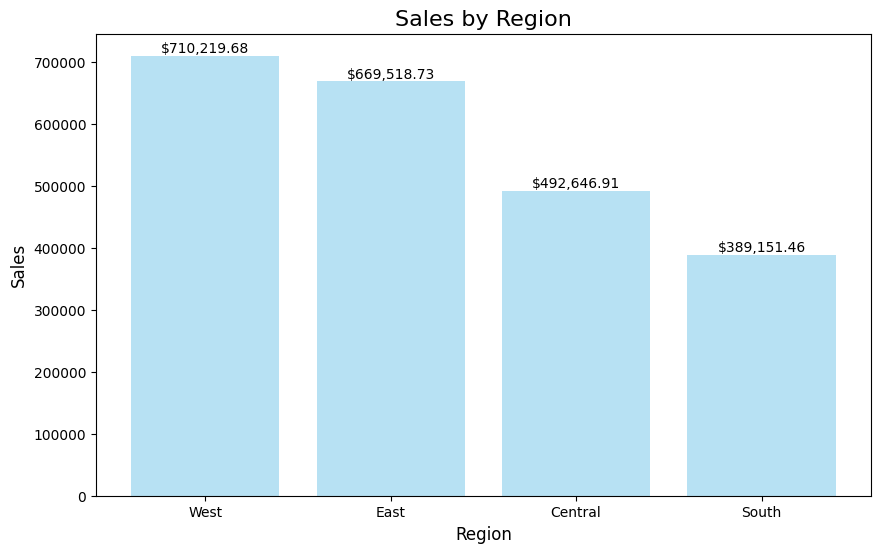

In [ ]:
# Sales by Region
region_sales = df.groupby('region')['sales'].sum().reset_index()
region_sales = region_sales.sort_values(by='sales', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(region_sales['region'], region_sales['sales'], color='skyblue', alpha=0.6)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales by Region', fontsize=16)

# Add annotations
for i, sales in enumerate(region_sales['sales']):
    plt.text(i, sales, f"${sales:,.2f}", ha='center', va='bottom', fontsize=10)

plt.show()

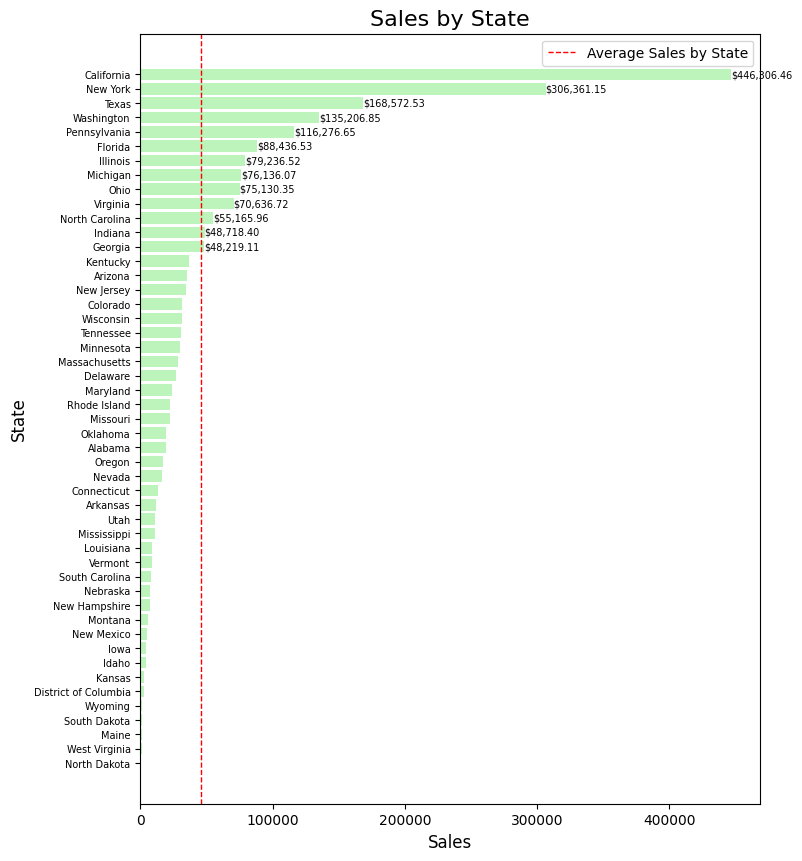

In [ ]:
# Sales by State
state_sales = df.groupby('state')['sales'].sum().reset_index()
state_sales = state_sales.sort_values(by='sales', ascending=True)
state_sales_mean = state_sales['sales'].mean()

plt.figure(figsize=(8, 10))
plt.barh(state_sales['state'], state_sales['sales'], color='lightgreen', alpha=0.6)
plt.axvline(x=state_sales_mean, color='red', linestyle='--', linewidth=1, label='Average Sales by State')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Sales by State', fontsize=16)
plt.yticks(fontsize=7)

# Add annotations
for i, sales in enumerate(state_sales['sales']):
  if sales > state_sales_mean:  # Only annotate above-average values
    plt.text(sales, i, f"${sales:,.2f}", va='center', fontsize=7)

plt.legend()
plt.show()

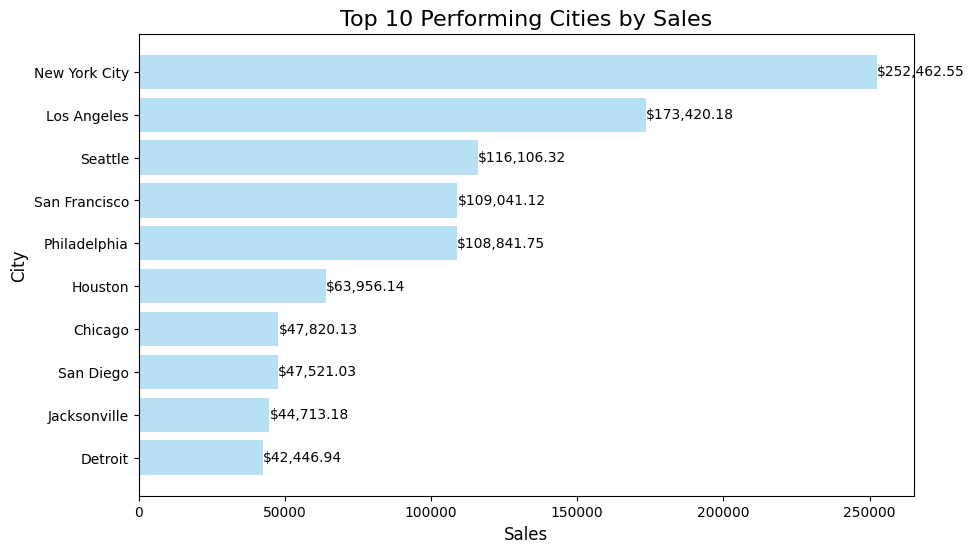

In [ ]:
# Top 10 Cities by Sales
top_city_sales = df.groupby('city')['sales'].sum().nlargest(10).iloc[::-1].reset_index()

plt.figure(figsize=(10, 6))
plt.barh(top_city_sales['city'], top_city_sales['sales'], color='skyblue', alpha=0.6)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Top 10 Performing Cities by Sales', fontsize=16)

for i, sales in enumerate(top_city_sales['sales']):
    plt.text(sales, i, f"${sales:,.2f}", va='center', fontsize=10)

plt.show()

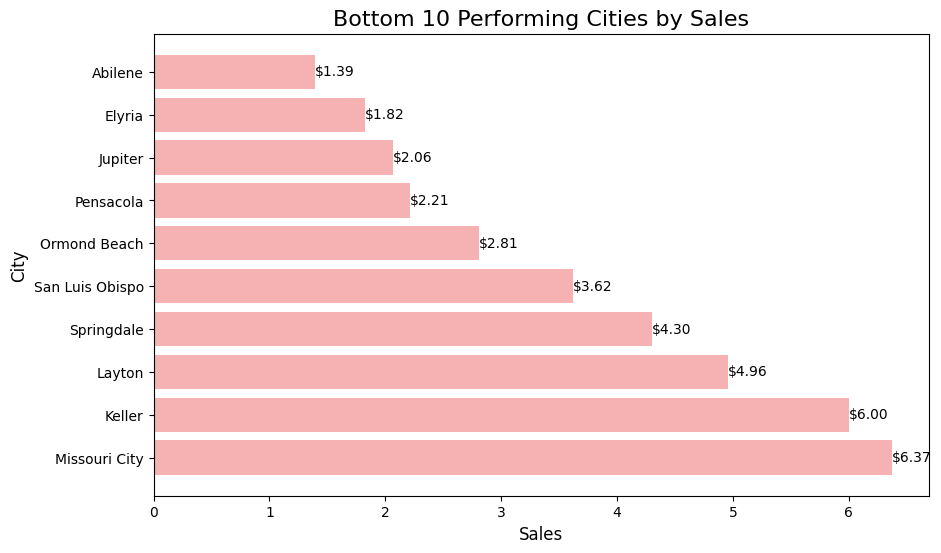

In [ ]:
# Bottom 10 Cities by Sales
least_city_sales = df.groupby('city')['sales'].sum().nsmallest(10).iloc[::-1].reset_index()

plt.figure(figsize=(10, 6))
plt.barh(least_city_sales['city'], least_city_sales['sales'], color='lightcoral', alpha=0.6)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.title('Bottom 10 Performing Cities by Sales', fontsize=16)

for i, sales in enumerate(least_city_sales['sales']):
    plt.text(sales, i, f"${sales:,.2f}", va='center', fontsize=10)

plt.show()


### Operational Performance




In [ ]:
df['date_diff'] = (df['ship_date'] - df['order_date']).dt.days
avg_delivery_time = df['date_diff'].mean()

print(f'Average delivery time is {avg_delivery_time:.2f} days')


Average delivery time is 3.96 days


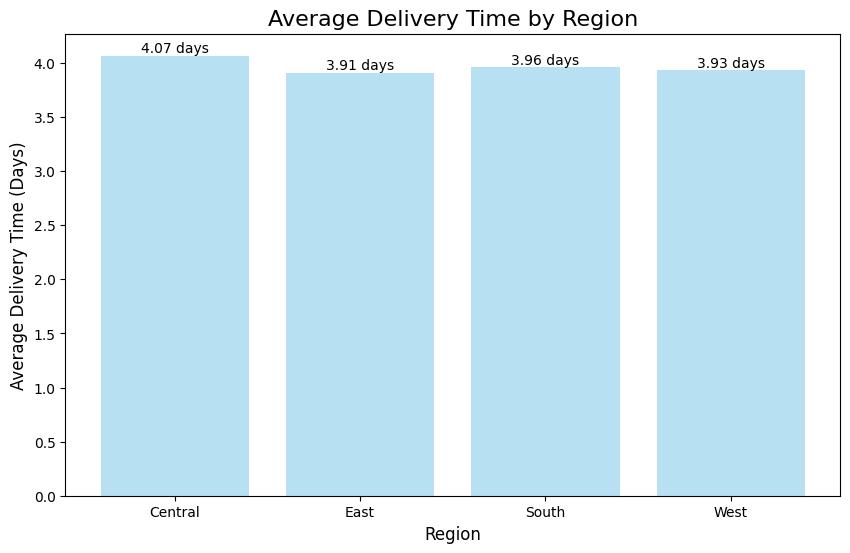

In [ ]:
# Average Delivery Time by Region
region_delivery_time = df.groupby('region')['date_diff'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(region_delivery_time['region'], region_delivery_time['date_diff'], color='skyblue', alpha=0.6)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Delivery Time (Days)', fontsize=12)
plt.title('Average Delivery Time by Region', fontsize=16)

# Add annotations
for i, days in enumerate(region_delivery_time['date_diff']):
    plt.text(i, days, f"{days:.2f} days", ha='center', va='bottom', fontsize=10)

plt.show()

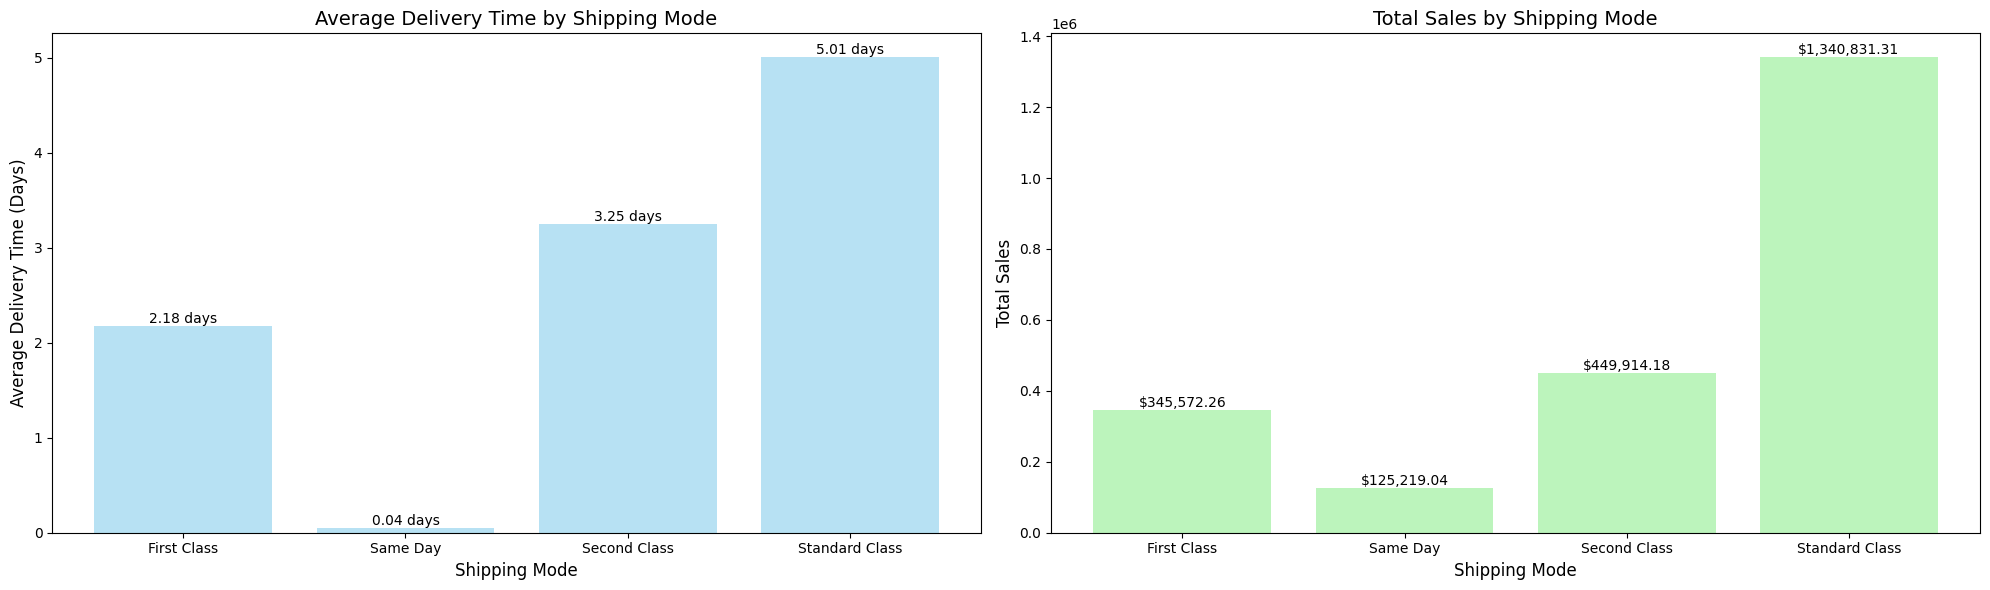

In [ ]:
# Shipping Mode Analysis
ship_mode_delivery = df.groupby('ship_mode').agg(
    avg_delivery_time=('date_diff', 'mean'),
    sales=('sales', 'sum')
).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Average Delivery Time by Shipping Mode
ax1.bar(ship_mode_delivery['ship_mode'], ship_mode_delivery['avg_delivery_time'], color='skyblue', alpha=0.6)
ax1.set_title('Average Delivery Time by Shipping Mode', fontsize=14)
ax1.set_xlabel('Shipping Mode', fontsize=12)
ax1.set_ylabel('Average Delivery Time (Days)', fontsize=12)

for i, days in enumerate(ship_mode_delivery['avg_delivery_time']):
    ax1.text(i, days, f"{days:.2f} days", ha='center', va='bottom', fontsize=10)

# Total Sales by Shipping Mode
ax2.bar(ship_mode_delivery['ship_mode'], ship_mode_delivery['sales'], color='lightgreen', alpha=0.6)
ax2.set_title('Total Sales by Shipping Mode', fontsize=14)
ax2.set_xlabel('Shipping Mode', fontsize=12)
ax2.set_ylabel('Total Sales', fontsize=12)

for i, sales in enumerate(ship_mode_delivery['sales']):
    ax2.text(i, sales, f"${sales:,.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

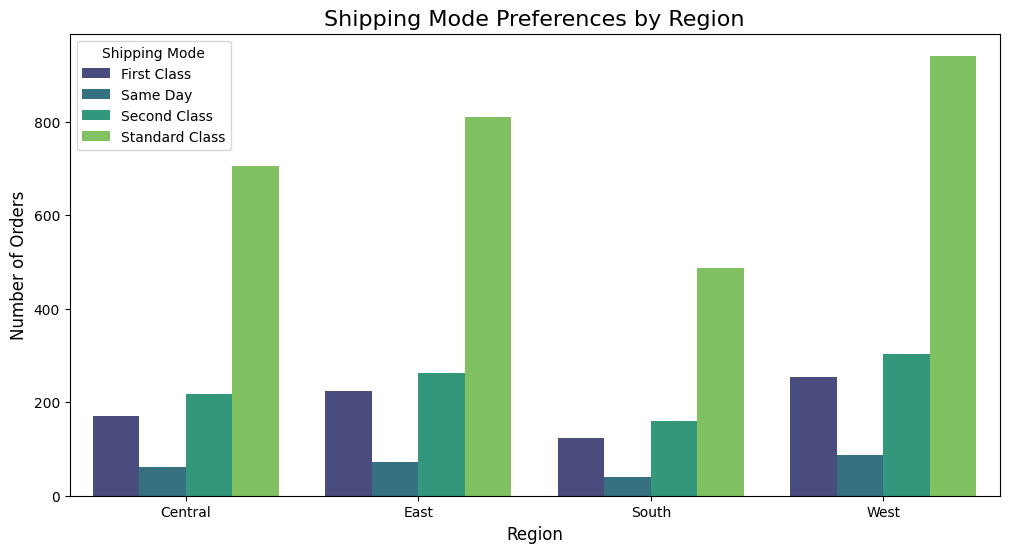

In [ ]:
# Shipping Mode Preferences by Region
region_ship_mode = df.groupby(['region', 'ship_mode'])['order_id'].nunique().reset_index()
region_ship_mode = region_ship_mode.rename(columns={'order_id': 'number_of_orders'})

plt.figure(figsize=(12, 6))
sns.barplot(data=region_ship_mode, x='region', y='number_of_orders', hue='ship_mode', palette='viridis')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Shipping Mode Preferences by Region', fontsize=16)
plt.legend(title='Shipping Mode')
plt.show()

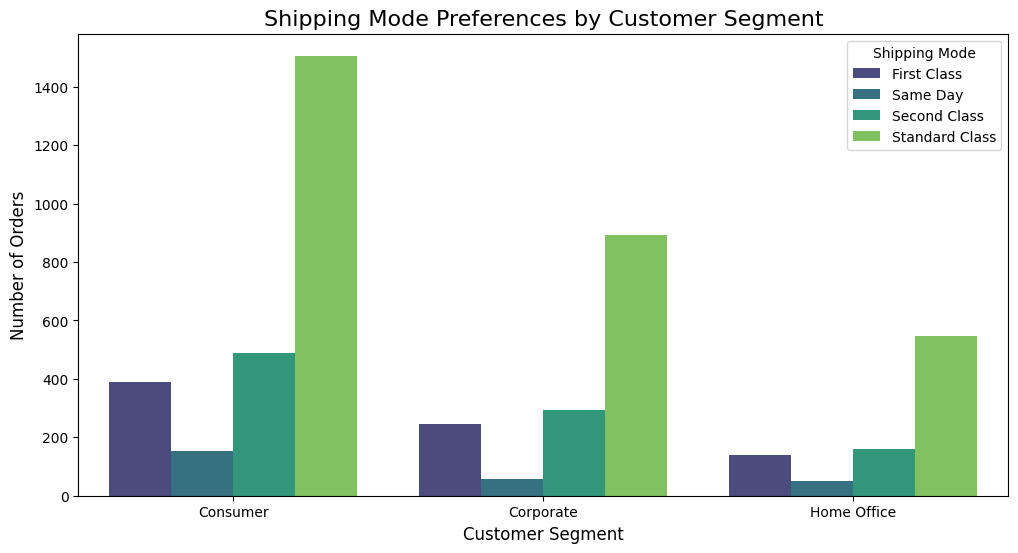

In [ ]:
# Shipping Mode Preferences by Segment
segment_ship_mode = df.groupby(['segment', 'ship_mode'])['order_id'].nunique().reset_index()
segment_ship_mode = segment_ship_mode.rename(columns={'order_id': 'number_of_orders'})

plt.figure(figsize=(12, 6))
sns.barplot(data=segment_ship_mode, x='segment', y='number_of_orders', hue='ship_mode', palette='viridis')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Shipping Mode Preferences by Customer Segment', fontsize=16)
plt.legend(title='Shipping Mode')
plt.show()

Key Insights:
* The overall average delivery time is 3.96 days, indicating relatively stable logistics performance.
* Delivery Performance Across Regions
  - Central region has the longest delivery time (4.07 days), suggesting possible inefficiencies or delays in fulfillment.
  - West region has the shortest delivery time (3.93 days), but the difference between regions is minimal (~0.14 days), indicating operational consistency.
* Shipping Mode Preferences
  - Standard Class dominates in both order volume and sales, showing that most customers prioritize affordability over speed.
  - Same-Day shipping has the fastest delivery time (0.04 days) but very low adoption, suggesting either lack of awareness, high costs, or limited availability.
  - First Class (2.18 days) and Second Class (3.25 days) offer faster delivery than Standard Class but are not as widely adopted, indicating price sensitivity.
* Regional Order Distribution
  - West and East regions generate the highest order volumes, suggesting these areas are key revenue drivers.
  - South has the lowest order volume, presenting a potential growth opportunity.
* Customer Segmentation
  - The "Consumer" segment is the primary driver of all shipping modes, especially Standard Class, indicating strong B2C demand.
  - Coorporate customers have low adoption of premium shipping options, potentially due to alternative logistics solutions or negotiated shipping terms.
* There is no clear correlation between faster shipping and higher order volumes, suggesting that speed alone may not be a primary factor in customer purchasing decisions.

Actionable Strategies:
* Optimize Standard Class logistics to maintain its affordability while reducing delivery time further.
* Explore pricing strategies for premium shipping options (First & Second Class) to improve adoption without significantly impacting margins.
* Develop Coorporate-specific shipping incentives to encourage enterprises to adopt faster shipping options.
